In [67]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as colors
from matplotlib import cm
from scipy.spatial import KDTree
# from ipywidgets import interact
import matplotlib.image as mpimg
from matplotlib.ticker import NullLocator
from PIL import Image

In [68]:
%pwd

'd:\\pgrimes\\Software\\fixthejet'

In [102]:
img = Image.open('images/Beam_B3FFBM.png', formats=['png'])

In [103]:
img.mode

'RGBA'

In [104]:
img = img.convert("RGBA")

In [110]:
img.getdata()

In [111]:
img = np.array(img.getdata()).reshape(img.size[1], img.size[0], 4)

In [116]:
np.issubdtype(int, img.dtype)

True

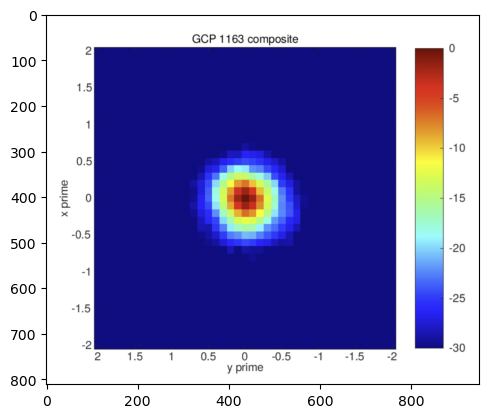

In [93]:
plt.imshow(img)

In [94]:
cbar_extents = (811,864,76,731)

In [95]:
left = cbar_extents[0]
right = cbar_extents[1]
top = cbar_extents[2]
bottom = cbar_extents[3]

cbar = img[top:bottom+1, left:right+1,  :]

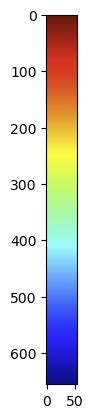

In [96]:
plt.imshow(cbar)

In [97]:
cscale = np.mean(cbar, axis=1)

In [98]:
cscale

array([[0.34887436, 0.09803922, 0.06673929, 1.        ],
       [0.41169208, 0.08235294, 0.04313725, 1.        ],
       [0.41561365, 0.08235294, 0.04313725, 1.        ],
       ...,
       [0.0627451 , 0.05105301, 0.51358025, 1.        ],
       [0.0627451 , 0.05105301, 0.50573711, 1.        ],
       [0.07850399, 0.0745098 , 0.41169208, 1.        ]], shape=(656, 4))

In [99]:
list(map(tuple, cscale))

[(np.float64(0.348874364560639),
  np.float64(0.09803921568627448),
  np.float64(0.06673928830791585),
  np.float64(1.0)),
 (np.float64(0.4116920842411036),
  np.float64(0.08235294117647061),
  np.float64(0.04313725490196079),
  np.float64(1.0)),
 (np.float64(0.41561365286855456),
  np.float64(0.08235294117647061),
  np.float64(0.04313725490196079),
  np.float64(1.0)),
 (np.float64(0.4233841684822074),
  np.float64(0.08627450980392158),
  np.float64(0.04320987654320988),
  np.float64(1.0)),
 (np.float64(0.4234567901234565),
  np.float64(0.08627450980392158),
  np.float64(0.04320987654320988),
  np.float64(1.0)),
 (np.float64(0.4352214960058094),
  np.float64(0.09019607843137252),
  np.float64(0.047131445170660854),
  np.float64(1.0)),
 (np.float64(0.4352214960058094),
  np.float64(0.09019607843137252),
  np.float64(0.047131445170660854),
  np.float64(1.0)),
 (np.float64(0.44691358024691313),
  np.float64(0.09411764705882353),
  np.float64(0.050980392156862724),
  np.float64(1.0)),
 (np

In [100]:
clist = list(map(tuple, cscale))
clist.reverse()
incmap = colors.LinearSegmentedColormap.from_list("input_cmap", clist)

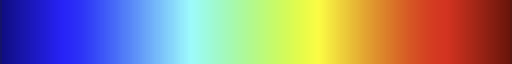

In [101]:
incmap

In [62]:
plt.get_cmap('jet')(range(256))

array([[0.        , 0.        , 0.5       , 1.        ],
       [0.        , 0.        , 0.51782531, 1.        ],
       [0.        , 0.        , 0.53565062, 1.        ],
       ...,
       [0.53565062, 0.        , 0.        , 1.        ],
       [0.51782531, 0.        , 0.        , 1.        ],
       [0.5       , 0.        , 0.        , 1.        ]], shape=(256, 4))

In [63]:
cin = incmap
cout = plt.get_cmap('viridis')

sub=256
d=0.2

oshape = img.shape

cinsub = cin.resampled(sub)(range(sub))
K = KDTree(cinsub)
oshape = img.shape
img_data = img.reshape((-1,4))
res = K.query(img_data, distance_upper_bound=d)
indices = res[1]
l = len(cinsub)
indices = indices.reshape(oshape[:2])
remapped = indices
indices.max()
mask = (res[0].reshape(oshape[:2]) > 0.9)
remapped = remapped / (l-1)
msk = [mask]*3
msk.append(np.ones_like(mask))
mask = np.stack(msk, axis=-1)
blend = np.where(mask, img, cout(remapped).astype(float)[:,:,:4])

In [66]:
print(blend)
print(np.max(blend))
print(np.min(blend))

[[[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  ...
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  ...
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  ...
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 ...

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  ...
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  ...
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  ...
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]]
1.0
0.0


In [65]:
mpimg.imsave("Test.png", blend)

In [45]:
np.min(blend)

np.float64(0.0)